In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/DaniCodeHub/data/master/iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
y = df['Species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [5]:
X = df.drop('Species', axis=1)
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# Preprocessing: Convert Categorical Data from ['Species'] to Numerical Data  (for f1_score to properly work) #

#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100, shuffle=True)

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, random_state=100, ccp_alpha=0.01)
dtc = dtc.fit(X_train, y_train)

In [10]:
y_dtc_train_pred = dtc.predict(X_train)
y_dtc_test_pred = dtc.predict(X_test)

In [11]:
y_dtc_train_pred

array(['virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'virginica', 'vers

In [12]:
y_dtc_test_pred

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor'], dtype=object)

In [13]:
from sklearn.metrics import accuracy_score, f1_score

In [14]:
# All classes labelled explicitly for f1 score #

#all_classes = [0, 1, 2]
all_classes = np.unique(y)

In [15]:
y_dtc_train_accuracy = accuracy_score(y_train, y_dtc_train_pred)
y_dtc_train_f1 = f1_score(y_train, y_dtc_train_pred, labels=all_classes, average='weighted', zero_division=0)

y_dtc_test_accuracy = accuracy_score(y_test, y_dtc_test_pred)
y_dtc_test_f1 = f1_score(y_test, y_dtc_test_pred, labels=all_classes, average='weighted', zero_division=0)

In [16]:
y_dtc_train_accuracy

0.9896907216494846

In [17]:
y_dtc_test_accuracy

0.9622641509433962

In [18]:
y_dtc_train_f1

0.9896994122950908

In [19]:
y_dtc_test_f1

0.9622641509433962

In [20]:
dtc_results = pd.DataFrame(['Decision Tree', y_dtc_train_accuracy, y_dtc_train_f1, y_dtc_test_accuracy, y_dtc_test_f1]).transpose()
dtc_results.columns = ['Method', 'Train Accuracy', 'Train F1', 'Test Accuracy', 'Test F1']
dtc_results

,Method,Train Accuracy,Train F1,Test Accuracy,Test F1
0,Decision Tree,0.989691,0.989699,0.962264,0.962264


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_dtc_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.92      0.92      0.92        13
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



In [22]:
from sklearn import tree
feature_names = X.columns
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
feature_importance = pd.DataFrame(dtc.feature_importances_, index=feature_names).sort_values(0, ascending=False)
feature_importance

,0
Petal.Length,0.545094
Petal.Width,0.430834
Sepal.Length,0.024072
Sepal.Width,0.000000


In [24]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['Petal.Length', 'Petal.Width', 'Sepal.Length']

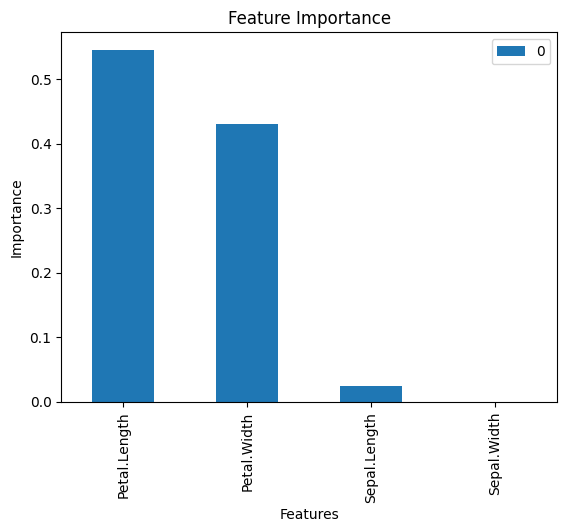

In [27]:
feature_importance.head(10).plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

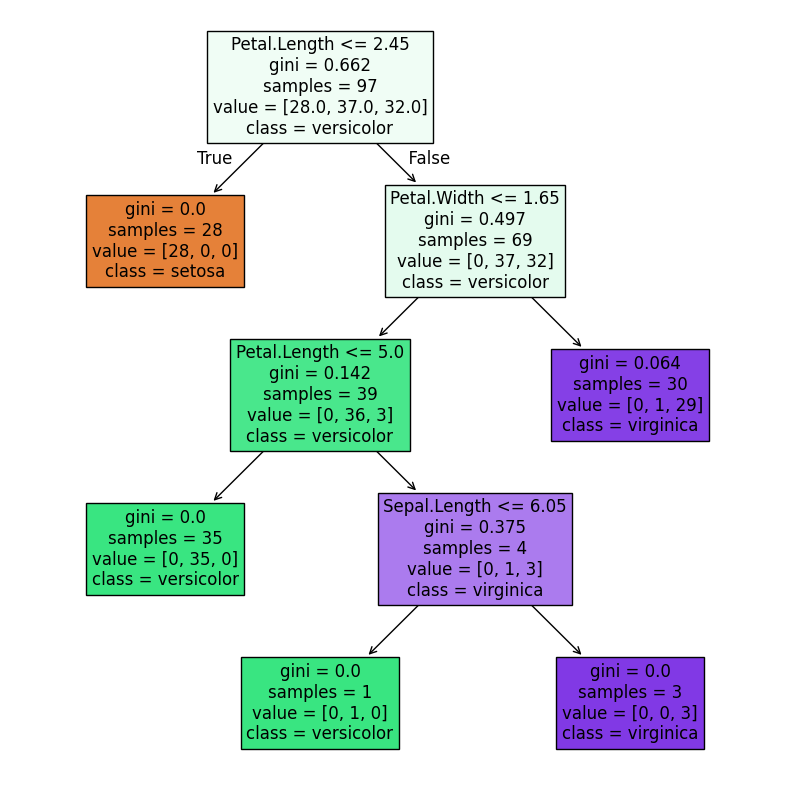

In [26]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dtc,
                   feature_names=feature_names,
                   class_names={0: 'setosa', 1: 'versicolor', 2: 'virginica'},
                   filled=True,
                   fontsize=12)
                                